## AhmadReza Nopoush | id: 610301194
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## PART 1

### Deriving Objective function


Given:

* $Y_i \sim \text{Gamma}(\nu, \lambda_i)$

so, Gamma PDF:

$$
f(y_i | \nu, \lambda_i) = \frac{\lambda_i^\nu}{\Gamma(\nu)} y_i^{\nu - 1} e^{-\lambda_i y_i}
$$

* Mean: $\mu_i = \frac{\nu}{\lambda_i}$, so $\lambda_i = \frac{\nu}{\mu_i}$
* Link function: $\log(\mu_i) = x_i^\top \beta \Rightarrow \mu_i = e^{x_i^\top \beta}$



#### **Likelihood:**
The likelihood function $L(\beta, \nu)$ is the product of the individual PDFs for all observed $y_i$:

$$
L(\beta, \nu) = \prod_{i=1}^n f(y_i | \nu, \lambda_i) = \prod_{i=1}^n \frac{\lambda_i^\nu}{\Gamma(\nu)} y_i^{\nu - 1} e^{-\lambda_i y_i}
$$

Substitute $\lambda_i = \frac{\nu}{e^{x_i^\top \beta}}$:

$$
L(\beta, \nu) = \prod_{i=1}^n \frac{\left(\frac{\nu}{e^{x_i^\top \beta}}\right)^\nu}{\Gamma(\nu)} y_i^{\nu - 1} e^{-\left(\frac{\nu}{e^{x_i^\top \beta}}\right) y_i}  =  \prod_{i=1}^n \frac{\nu^\nu e^{-\nu x_i^\top \beta}}{\Gamma(\nu)} y_i^{\nu - 1} e^{-\nu y_i e^{-x_i^\top \beta}} \Rightarrow
$$

$$
L(\beta, \nu) = \nu^{n \nu} \left(\prod_{i=1}^n \frac{1}{\Gamma(\nu)} y_i^{\nu - 1}\right) \exp\left(-\nu \sum_{i=1}^n x_i^\top \beta - \nu \sum_{i=1}^n y_i e^{-x_i^\top \beta}\right)
$$

$$
\ln L(\beta,\nu) = \sum_{i=1}^n \left[ \nu \log \nu - \nu x_i^\top \beta - \log \Gamma(\nu) + (\nu - 1) \log y_i - \frac{\nu y_i}{e^{x_i^\top \beta}} \right]
$$

#### **Deriving the Log-Likelihood**

we have so far:

$$
L(\beta, \nu) = \nu^{n \nu} \left(\prod_{i=1}^n \frac{y_i^{\nu - 1}}{\Gamma(\nu)}\right) \exp\left(-\nu \sum_{i=1}^n \left(x_i^\top \beta + y_i e^{-x_i^\top \beta}\right)\right)
$$

Taking the logarithm

1. $\ln(\nu^{n\nu}) = n\nu\ln(\nu)$
2. $\ln\left(\prod_{i=1}^n \frac{y_i^{\nu - 1}}{\Gamma(\nu)}\right) = \sum_{i=1}^n \ln(y_i^{\nu - 1}) - \sum_{i=1}^n \ln(\Gamma(\nu))$
3. $\ln(e^{x}) = x$

Therefore:

$$
\begin{align*}
\ln L(\beta,\nu) &= n\nu\ln(\nu) + \sum_{i=1}^n (\nu - 1)\ln(y_i) - n\ln(\Gamma(\nu)) - \nu \sum_{i=1}^n \left(x_i^\top \beta + y_i e^{-x_i^\top \beta}\right)
\end{align*}
$$

which equals to:

$$
\ln (\beta, \nu) = n\nu\ln(\nu) - n\ln(\Gamma(\nu)) + (\nu - 1)\sum_{i=1}^n \ln(y_i) - \nu \sum_{i=1}^n x_i^\top \beta - \nu \sum_{i=1}^n y_i e^{-x_i^\top \beta}
$$


#### **Negative log-likelihood**

Terms like $ \ln \nu, \ln \Gamma(\nu), \ln y_i $ are **independent of** $ \beta $, so we can drop them for optimization. We focus on remainder part:

$$
-\nu \sum_{i=1}^n x_i^\top \beta - \nu \sum_{i=1}^n y_i e^{-x_i^\top \beta}
$$

Therefore:

$$
\text{NLL}(\beta) = \sum_{i=1}^n \left[ \nu x_i^\top \beta + \frac{\nu y_i}{e^{x_i^\top \beta}} \right]
$$

#### **Convexity**

From the derivation:

$$
\text{NLL}(\beta) = \nu \sum_{i=1}^n \left( x_i^\top \beta + \frac{y_i}{\exp(x_i^\top \beta)} \right)
$$

Let’s define:

* $\mu_i = \exp(x_i^\top \beta)$
* $f_i(\beta) = x_i^\top \beta + \frac{y_i}{\exp(x_i^\top \beta)}$

So the NLL is:

$$
\text{NLL}(\beta) = \nu \sum_{i=1}^n f_i(\beta)
$$

We want to prove that each $f_i(\beta)$ is convex.


Consider:

$$
f_i(\beta) = x_i^\top \beta + y_i \cdot \exp(-x_i^\top \beta)
$$

This is a sum of two terms:

1. **Linear term:** $x_i^\top \beta$ — convex (because it is affine).

2. **Exponential term:** $\exp(-x_i^\top \beta)$ — convex, since the composition of a convex function $\exp(z)$ with an affine function $-x_i^\top \beta$ is convex.

And since **$y_i > 0$** (Gamma-distributed $y_i$ are strictly positive), multiplying a convex function by a positive constant preserves convexity.

So:

$$
f_i(\beta) = \text{convex} + \text{convex} = \text{convex}
$$


**Sum of Convex Functions is Convex**

Since all $f_i(\beta)$ are convex, their sum is convex:

$$
\text{NLL}(\beta) = \nu \sum_{i=1}^n f_i(\beta) \quad \text{is convex (for } \nu > 0\text{)}
$$


The Negative Log-Likelihood function for Gamma regression:

$$
\text{NLL}(\beta) = \nu \sum_{i=1}^n \left( x_i^\top \beta + \frac{y_i}{\exp(x_i^\top \beta)} \right)
$$

is **convex** in $\beta$, since it is a sum of convex functions.

This convexity guarantees that:
* There is **a unique global minimum**.
* You can efficiently solve it using convex optimization techniques.


### EDA

importing libraries...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

reading data...

In [3]:
df = pd.read_csv('gamma.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   x3      1000 non-null   float64
 3   x4      1000 non-null   float64
 4   x5      1000 non-null   int64  
 5   y       1000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


In [4]:
df.describe()

,x1,x2,x3,x4,x5,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.025433,3.010198,0.794704,0.015902,0.589000,6.653052
std,1.112182,1.000166,0.394290,0.981481,0.492261,8.844500
min,1.000134,0.096149,0.102044,-3.525616,0.000000,0.105442
25%,2.047172,2.314324,0.468677,-0.636760,0.000000,1.925859
50%,3.017641,3.025743,0.796198,-0.028035,1.000000,3.691055
75%,3.972503,3.691170,1.131596,0.698384,1.000000,7.587637
max,4.998965,7.402141,1.497384,3.045147,1.000000,87.750251


#### Plots

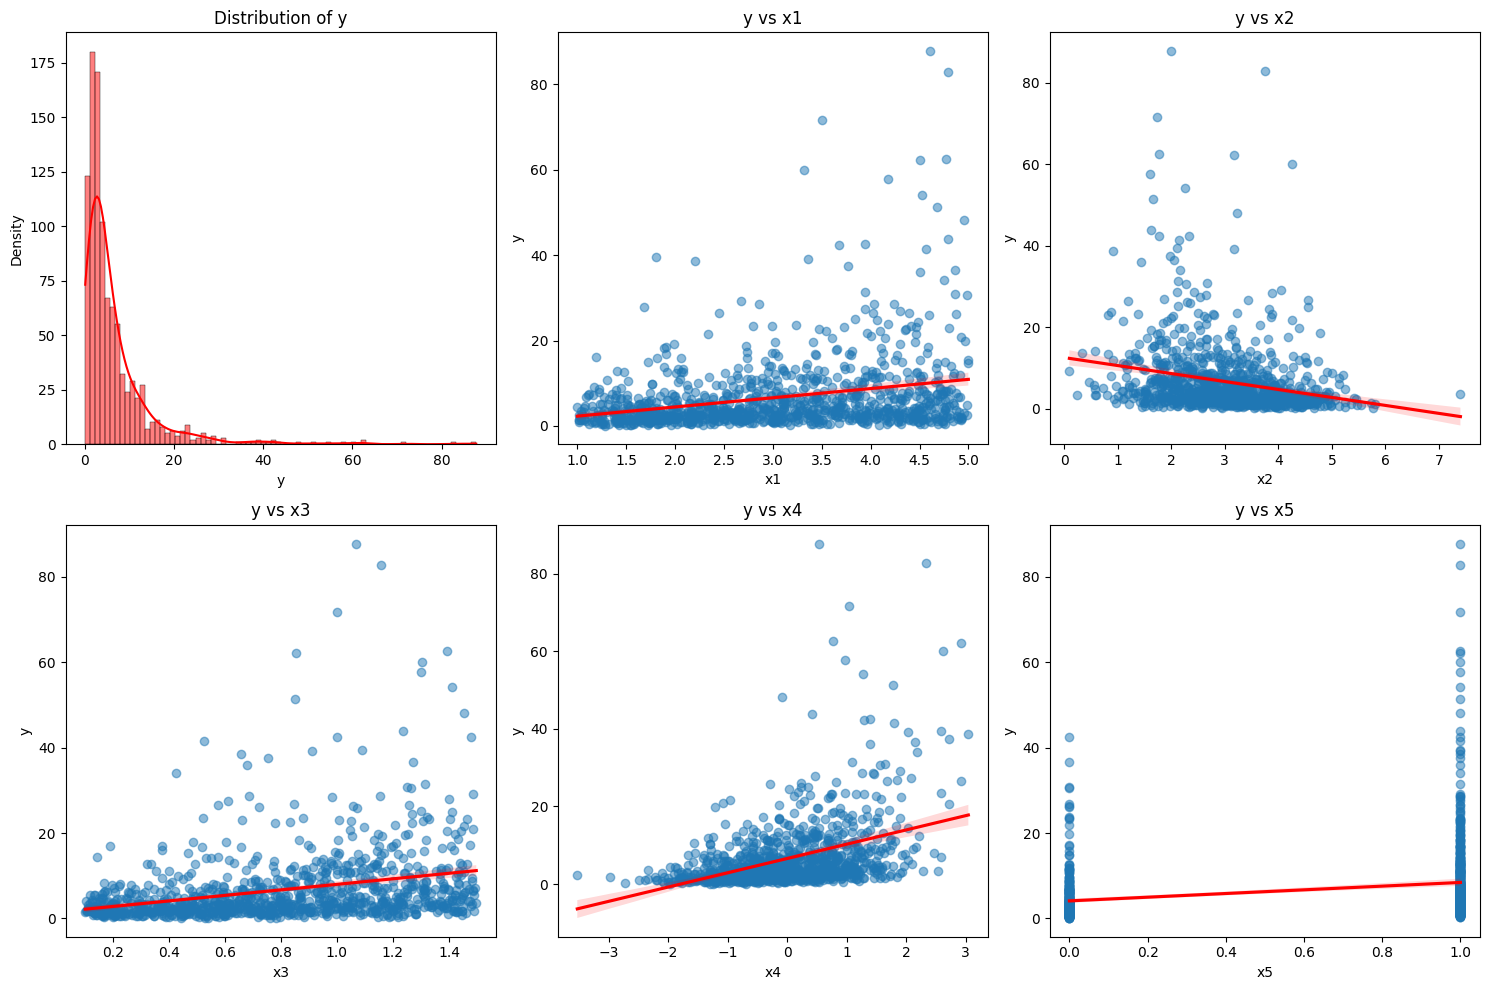

In [5]:
# Plot histogram of y and scatter plots of y vs each predictor using subplots
n_features = len(df.columns) - 1
total_plots = n_features + 1

# Setup for 2 rows
n_cols = (total_plots + 1) // 2
plt.figure(figsize=(5 * n_cols, 10))

# Plot distribution of y
plt.subplot(2, n_cols, 1)
sns.histplot(df['y'], kde=True,color="red")
plt.title('Distribution of y')
plt.xlabel('y')
plt.ylabel('Density')

# Scatter plots
features = df.columns.drop('y')
for i, col in enumerate(features, start=2):
    plt.subplot(2, n_cols, i)
    plt.scatter(df[col], df['y'], alpha=0.5)
    sns.regplot(data=df, x=col, y='y', scatter=False, color='red')
    plt.xlabel(col)
    plt.ylabel('y')
    plt.title(f'y vs {col}')

plt.tight_layout()
plt.show()


In [6]:
print("\nSkewness of Y:", stats.skew(df['y']))


Skewness of Y: 4.036524071774891


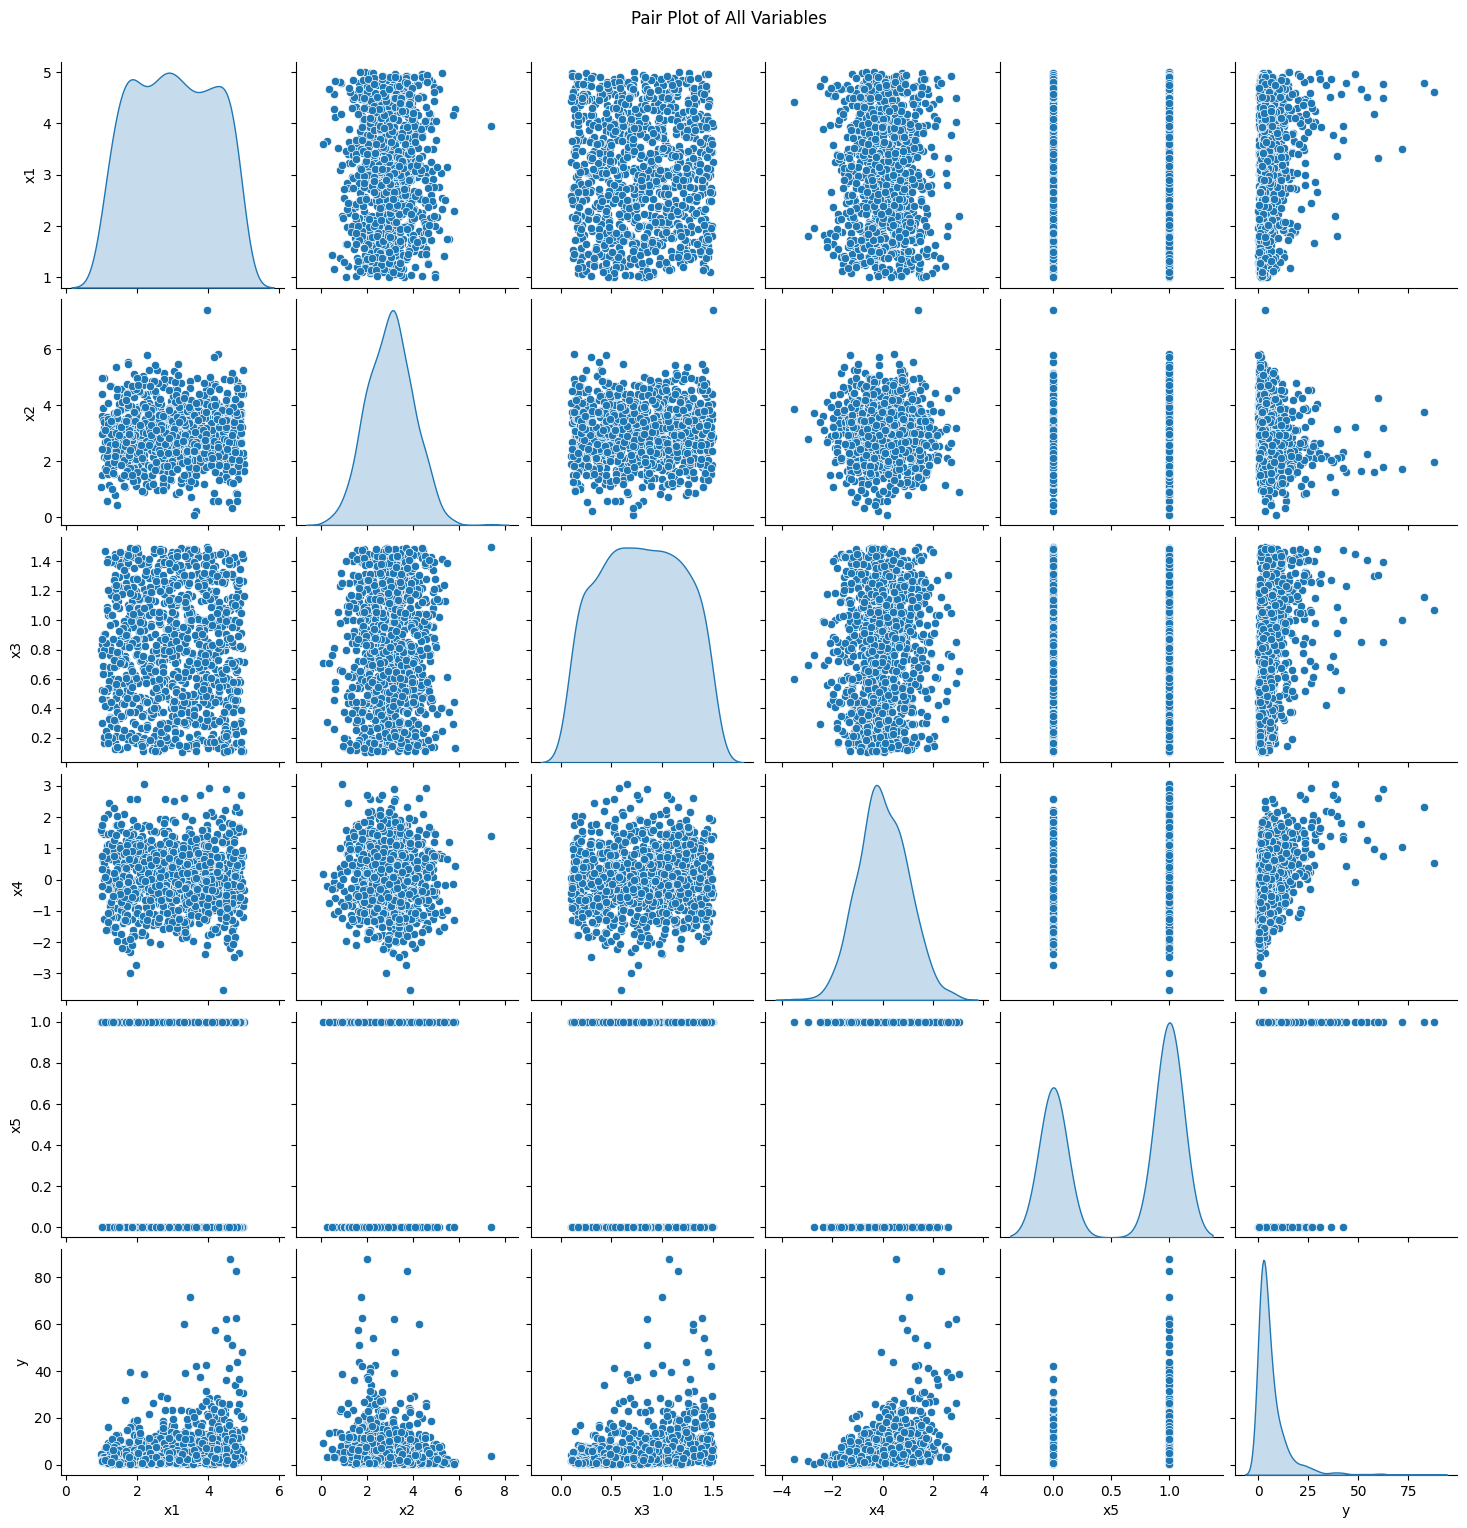

In [7]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot of All Variables', y=1.02)
plt.show()

#### 1. Is `y` strictly positive and right-skewed?

**Answer: Yes**

* From the histogram and KDE plot of `y`:

  * `y` is stricly positive because its min value is `=0.105442`
  * The distribution is **right-skewed**:
   1. the density is higher near smaller values, with a long tail extending to the right
   2. Mean (6.65) is much larger than median (3.69)
   3. the distribution is clearly non-symetric

#### 2. Does variance increase with mean?

**Answer: Yes**

* In the scatter plots of `y` vs each predictor (e.g., `x1`, `x2`, etc.):
  - In scatter plots, especially for x1, x3, and x4, the spread of Y values increases as the predictor values increase
  - The standard deviation (8.84) is larger than the mean (6.65), suggesting overdispersion
  - The range of Y values widens at higher predictor values

#### 3. Are relationships nonlinear or multiplicative?

**Answer: likely nonliear**

- The scatter plots show patterns that deviate from linear trends
- The red regression lines don't capture the true relationship well
- Particularly visible in plots for x1, x3, and x4
- The relationship appears more multiplicative/exponential than linear


#### 4. Why OLS is Not Appropriate

OLS would be inappropriate for this data for several reasons:

1. **Violation of Normality Assumption**:
   - OLS assumes normally distributed errors
   - The response variable Y is heavily right-skewed

2. **Heteroscedasticity**:
   - OLS assumes constant variance (homoscedasticity)
   - Clear evidence of increasing variance with the mean
   - Would lead to inefficient parameter estimates and invalid standard errors

3. **Non-negative Response**:
   - OLS can predict negative values
   - Y is strictly positive by nature
   - Gamma distribution naturally constrains predictions to positive values

4. **Non-linear Relationships**:
   - OLS assumes linear relationships
   - Data shows multiplicative/exponential patterns
   - Linear model would systematically misspecify the relationships

5. **Mean-Variance Relationship**:
   - OLS assumes independence between mean and variance
   - Data shows variance increasing with mean
   - Gamma regression naturally models this relationship

These characteristics suggest that Gamma regression with a log link would be more appropriate as it:
- Ensures positive predictions
- Handles right-skewed data
- Accounts for mean-variance relationship
- Better captures multiplicative effects through the log link



### Setup

In [8]:
import cvxpy as cp
from sklearn.preprocessing import StandardScaler

In [9]:
X = df.drop(columns='y').values
y = df['y'].values

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = np.column_stack([np.ones(len(X_scaled)), X_scaled])

n, d = X_scaled.shape

### CVXPY

In [11]:
beta = cp.Variable(d)
objective = cp.Minimize(cp.sum(X_scaled@ beta + cp.multiply(y, cp.exp(-X_scaled @ beta))))

problem = cp.Problem(objective)
problem.solve()
print(problem.value)

beta_cvxpy = beta.value
beta_cvxpy

2527.088322795458


array([ 1.52708793,  0.33409395, -0.28495082,  0.37088157,  0.48262317,
        0.36911998])

### Gradient Descent

In [12]:
def NLL(beta, X, y, nu=1):
    xb = X @ beta
    xb = np.clip(xb, -100, 100)
    mu = np.exp(-xb)
    return nu * (np.sum(xb) + np.sum(y * mu))

def NLL_Gradient(beta, X, y, nu=1):
    xb = X @ beta
    xb = np.clip(xb, -100, 100)
    mu = np.exp(-xb)
    grad = nu * (X.T @ np.ones(len(y)) - X.T @ (y*mu))
    grad = np.clip(grad, -1e10, 1e10)
    return grad

[ 1.21915354  0.30253843 -0.25906326  0.33863622  0.43962669  0.32308653]
2584.5180920882144


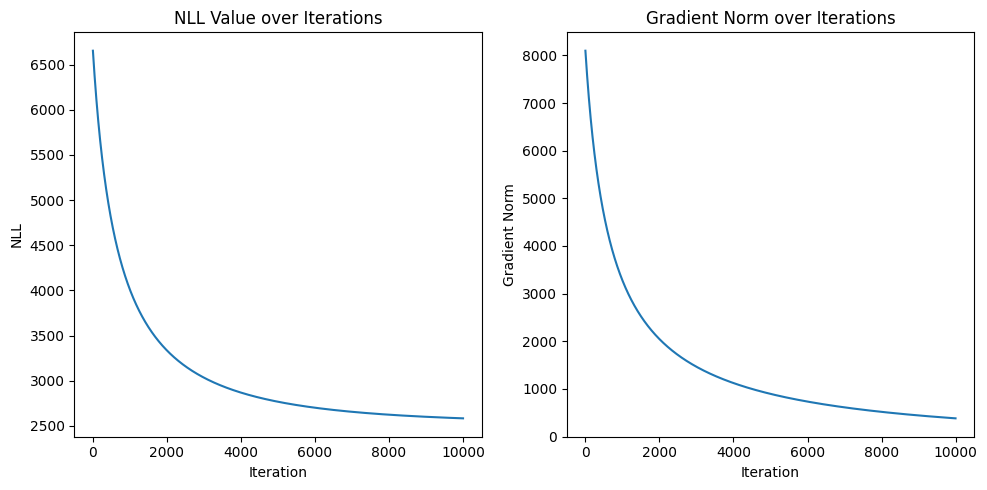

In [13]:
def gradient_descent(X, y, lr=1e-7, max_iter=10000, tol=1e-6):
    beta = np.zeros(X.shape[1])
    history = {
        'NLL': [],
        'Grad': [],
    }
    for _ in range(max_iter):
        grad = NLL_Gradient(beta, X, y)
        grad_norm = np.linalg.norm(grad)
        nll_val = NLL(beta, X, y)
        history['NLL'].append(nll_val)
        history['Grad'].append(grad_norm)
        beta -= lr * grad
        if grad_norm < tol:
            break
    return beta, history

# Run gradient descent
beta_grad, grad_history = gradient_descent(X_scaled, y)

print(beta_grad)
print(NLL(beta_grad, X_scaled, y))

# Plot NLL value and gradient norm over iterations
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(grad_history["NLL"])
ax[0].set_title('NLL Value over Iterations')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('NLL')

ax[1].plot(grad_history["Grad"])
ax[1].set_title('Gradient Norm over Iterations')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Gradient Norm')

plt.tight_layout()
plt.show()

### Newton Method

In [14]:
def NLL_Hessian(beta, X, y, nu=1):
    xb = X @ beta
    xb = np.clip(xb, -100, 100)
    mu = np.exp(-xb)
    W = np.diag(nu * y * mu)
    return X.T @ W @ X

[ 1.52708832  0.33409443 -0.28495121  0.37088168  0.48262348  0.36912022]
2527.088322795093


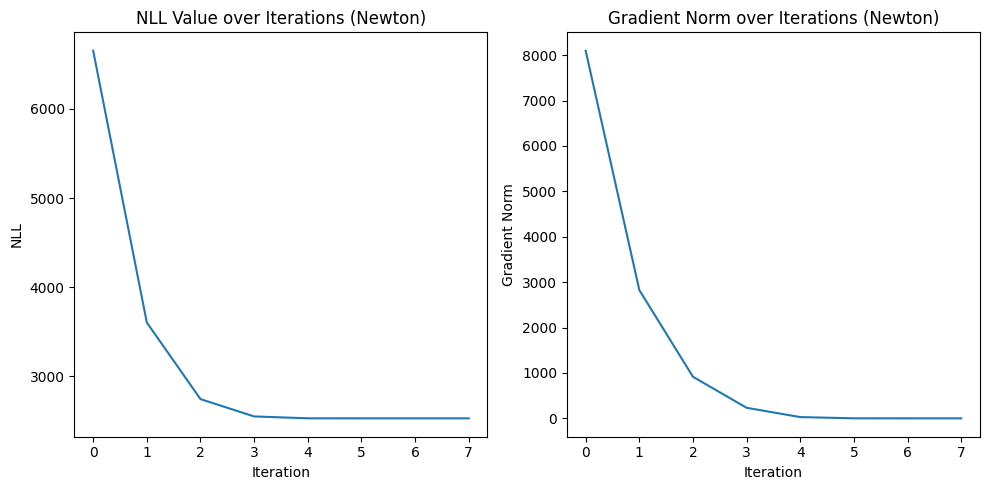

In [15]:


def newton_method(X, y, max_iter=100, tol=1e-6):
    beta = np.zeros(X.shape[1])
    history = {
        'NLL': [],
        'Grad': [],
    }
    for _ in range(max_iter):
        grad = NLL_Gradient(beta, X, y)
        grad_norm = np.linalg.norm(grad)
        nll_val = NLL(beta, X, y)
        history['NLL'].append(nll_val)
        history['Grad'].append(grad_norm)
        H = NLL_Hessian(beta, X, y)
        try:
            delta = np.linalg.solve(H, grad)
        except np.linalg.LinAlgError:
            print("Hessian is singular or ill-conditioned.")
            break
        beta -= delta
        if grad_norm < tol:
            break
    return beta, history

beta_newton, newton_history = newton_method(X_scaled, y)

print(beta_newton)
print(NLL(beta_newton, X_scaled, y))

# Plot NLL value and gradient norm over iterations
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].plot(newton_history["NLL"])
ax[0].set_title('NLL Value over Iterations (Newton)')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('NLL')

ax[1].plot(newton_history["Grad"])
ax[1].set_title('Gradient Norm over Iterations (Newton)')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Gradient Norm')

plt.tight_layout()
plt.show()

### Statsmodel

In [16]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_scaled)  # Add intercept if needed
model = sm.GLM(y, X_sm, family=sm.families.Gamma(sm.families.links.log()))
result = model.fit()
beta_statsmodels = result.params

print(beta_statsmodels)
print(NLL(beta_statsmodels, X_scaled, y))

[ 1.52708832  0.33409443 -0.28495121  0.37088168  0.48262348  0.36912022]
2527.0883227950926


c:\Users\nopou\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


### Comparison

In [17]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


# Metrics storage
results = {
    "cvxpy": {"rmse": [], "r2_adj": [], "time": []},
    "gd": {"rmse": [], "r2_adj": [], "time": []},
    "newton": {"rmse": [], "r2_adj": [], "time": []},
    "statsmodels": {"rmse": [], "r2_adj": [], "time": []}
}


def adjusted_r2(y_true, y_pred, d):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    r2 = 1 - ss_res / ss_tot
    return 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - d - 1)

# Cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # CVXPY
    start = time.time()
    beta = cp.Variable(d)
    objective = cp.Minimize(cp.sum(X_scaled@ beta + cp.multiply(y, cp.exp(-X_scaled @ beta))))
    problem = cp.Problem(objective)
    problem.solve()
    beta_val = beta.value
    y_pred = np.exp(X_test @ beta_val)
    end = time.time()
    results["cvxpy"]["rmse"].append(np.sqrt(mean_squared_error(y_test, y_pred)))
    results["cvxpy"]["r2_adj"].append(adjusted_r2(y_test, y_pred, d))
    results["cvxpy"]["time"].append(end - start)

    # Gradient Descent
    start = time.time()
    beta_grad, _ = gradient_descent(X_train, y_train)
    y_pred = np.exp(np.clip(X_test @ beta_grad,-100,100))
    end = time.time()
    results["gd"]["rmse"].append(np.sqrt(mean_squared_error(y_test, y_pred)))
    results["gd"]["r2_adj"].append(adjusted_r2(y_test, y_pred, d))
    results["gd"]["time"].append(end - start)

    # Newton-Raphson
    beta_newton, _ = newton_method(X_train, y_train)
    y_pred = np.exp(np.clip(X_test @ beta_grad,-100,100))
    end = time.time()
    results["newton"]["rmse"].append(np.sqrt(mean_squared_error(y_test, y_pred)))
    results["newton"]["r2_adj"].append(adjusted_r2(y_test, y_pred, d))
    results["newton"]["time"].append(end - start)

    # Statsmodels
    start = time.time()
    model = sm.GLM(y_train, X_train, family=sm.families.Gamma(sm.families.links.log()))
    result = model.fit()
    y_pred = result.predict(X_test)
    end = time.time()
    results["statsmodels"]["rmse"].append(np.sqrt(mean_squared_error(y_test, y_pred)))
    results["statsmodels"]["r2_adj"].append(adjusted_r2(y_test, y_pred, d + 1))  # +1 for intercept
    results["statsmodels"]["time"].append(end - start)

results_summary = {
    k: {
        "RMSE Mean": np.mean(v["rmse"]),
        "Adjusted R2 Mean": np.mean(v["r2_adj"]),
        "Time Mean": np.mean(v["time"])
    }
    for k, v in results.items()
}

c:\Users\nopou\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
c:\Users\nopou\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
c:\Users\nopou\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
c:\Users\nopou\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0

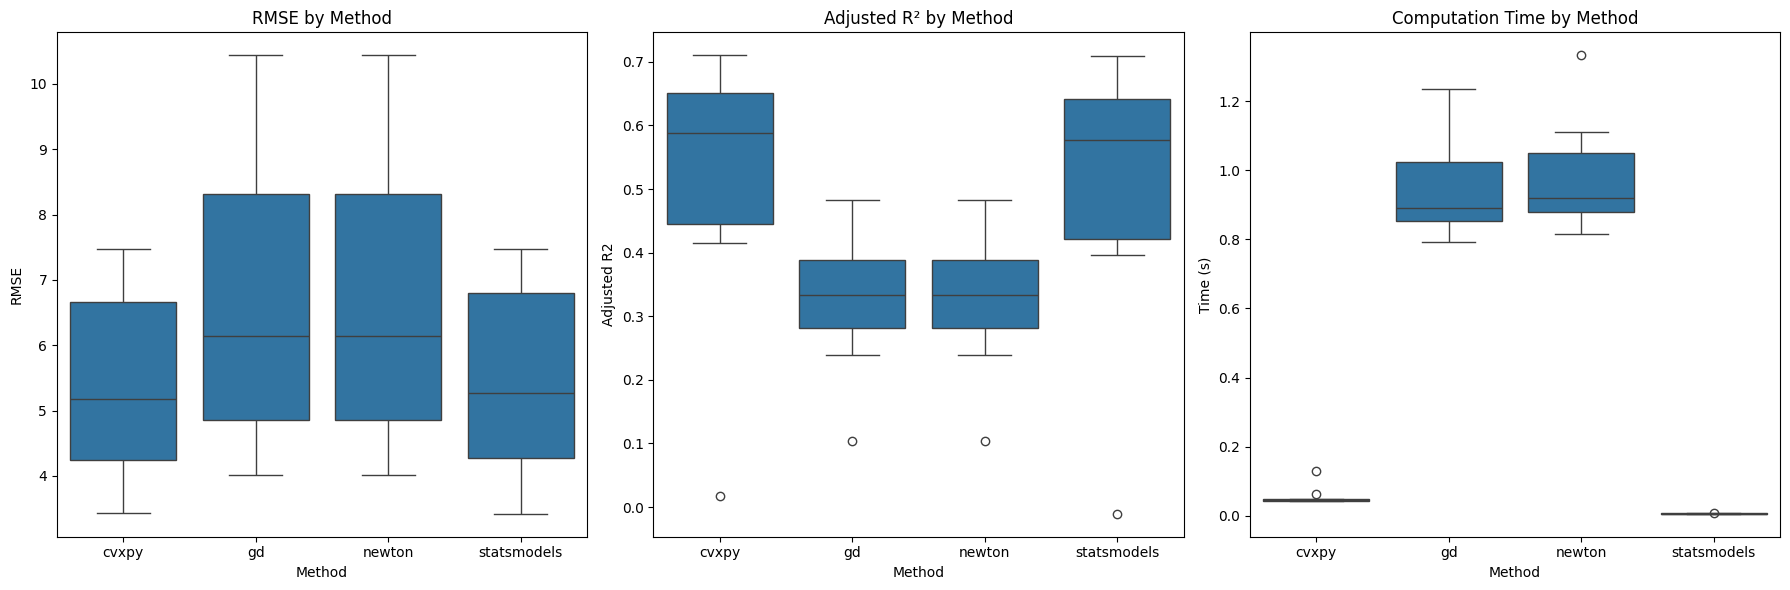

In [18]:
# Convert results dictionary into a long-form DataFrame for boxplot
data_for_plot = []

for method, metrics in results.items():
    for rmse, r2, t in zip(metrics["rmse"], metrics["r2_adj"], metrics["time"]):
        data_for_plot.append({
            "Method": method,
            "RMSE": rmse,
            "Adjusted R2": r2,
            "Time (s)": t
        })

df_plot = pd.DataFrame(data_for_plot)

# Plot boxplots for RMSE, Adjusted R2, and Time
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x="Method", y="RMSE", data=df_plot, ax=axs[0])
axs[0].set_title("RMSE by Method")

sns.boxplot(x="Method", y="Adjusted R2", data=df_plot, ax=axs[1])
axs[1].set_title("Adjusted R² by Method")

sns.boxplot(x="Method", y="Time (s)", data=df_plot, ax=axs[2])
axs[2].set_title("Computation Time by Method")

plt.tight_layout()
plt.show()


In [19]:
for model,info in results_summary.items():
    print(model,": ")
    for static,val in info.items():
        print(static,val)

cvxpy : 
RMSE Mean 5.340269168218263
Adjusted R2 Mean 0.5224727202844226
Time Mean 0.054984664916992186
gd : 
RMSE Mean 6.626411642103305
Adjusted R2 Mean 0.3275695438746554
Time Mean 0.9471315622329712
newton : 
RMSE Mean 6.626411642103305
Adjusted R2 Mean 0.3275695438746554
Time Mean 0.9818988084793091
statsmodels : 
RMSE Mean 5.3927326630610946
Adjusted R2 Mean 0.5082207162314234
Time Mean 0.0067741632461547855


## PART II: SVM

importing libraries...

In [20]:
import cvxpy as cp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#### Preprocess data

In [21]:
df = pd.read_csv("svm.csv")
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.754512,0.368828,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,1
1,-0.678398,0.284237,-0.469474,0.542560,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,1
2,-1.008829,0.544500,-1.012831,0.314247,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748,1
3,-0.691218,0.620512,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,-0.601707,1.852278,1
4,0.810736,-1.565761,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,0


In [22]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
count,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,-1.421085e-17,1.509903e-17,-0.003559,-0.030142,-0.036247,-0.014268,0.056681,-0.013602,-0.015789,0.029258,0.50000
std,1.000500e+00,1.000500e+00,1.000943,1.001674,0.989729,1.010226,0.981118,1.014650,1.034447,1.023984,0.50025
min,-2.235637e+00,-2.165466e+00,-3.019512,-3.044657,-2.954249,-3.688365,-3.221016,-3.601085,-3.241267,-2.921350,0.00000
25%,-7.802574e-01,-7.878106e-01,-0.672737,-0.712035,-0.705619,-0.700818,-0.606864,-0.720126,-0.686291,-0.649524,0.00000
50%,3.322351e-02,-1.061979e-02,0.001838,-0.038685,-0.053213,-0.004218,0.057829,-0.009423,-0.016323,0.033041,0.50000
75%,7.825675e-01,7.527422e-01,0.660068,0.650634,0.638627,0.683922,0.716207,0.642255,0.655810,0.686548,1.00000
max,1.992309e+00,2.046946e+00,2.935658,3.852731,2.949094,3.529055,3.243093,3.137749,3.152057,3.926238,1.00000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   x3      1000 non-null   float64
 3   x4      1000 non-null   float64
 4   x5      1000 non-null   float64
 5   x6      1000 non-null   float64
 6   x7      1000 non-null   float64
 7   x8      1000 non-null   float64
 8   x9      1000 non-null   float64
 9   x10     1000 non-null   float64
 10  y       1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


change ``y = 0`` to `` y = -1 ``

In [24]:
df['y'] = df['y'].apply(lambda y: -1 if y == 0 else 1)

seperate predicators and target

In [25]:
X = df.drop('y', axis=1).to_numpy()
y = df['y'].copy()

In [26]:
df.drop('y',axis=1)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.754512,0.368828,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435
1,-0.678398,0.284237,-0.469474,0.542560,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288
2,-1.008829,0.544500,-1.012831,0.314247,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748
3,-0.691218,0.620512,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,-0.601707,1.852278
4,0.810736,-1.565761,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
...,...,...,...,...,...,...,...,...,...,...
995,0.468338,1.556655,-0.630458,1.637082,-0.780144,0.735269,-0.559164,-0.460307,1.030250,-0.380037
996,-1.780741,-0.573112,-0.404795,1.132805,1.597397,0.644690,-0.654770,-0.510608,0.079915,0.320930
997,-0.086928,-1.003652,-0.987866,0.723038,0.085513,-1.715708,-0.928926,-0.504129,-0.072858,1.889279
998,1.136705,-1.507464,0.238171,-0.840772,0.220631,-0.352088,0.324758,0.580568,1.209231,-0.024286


#### Is given data Normalized?

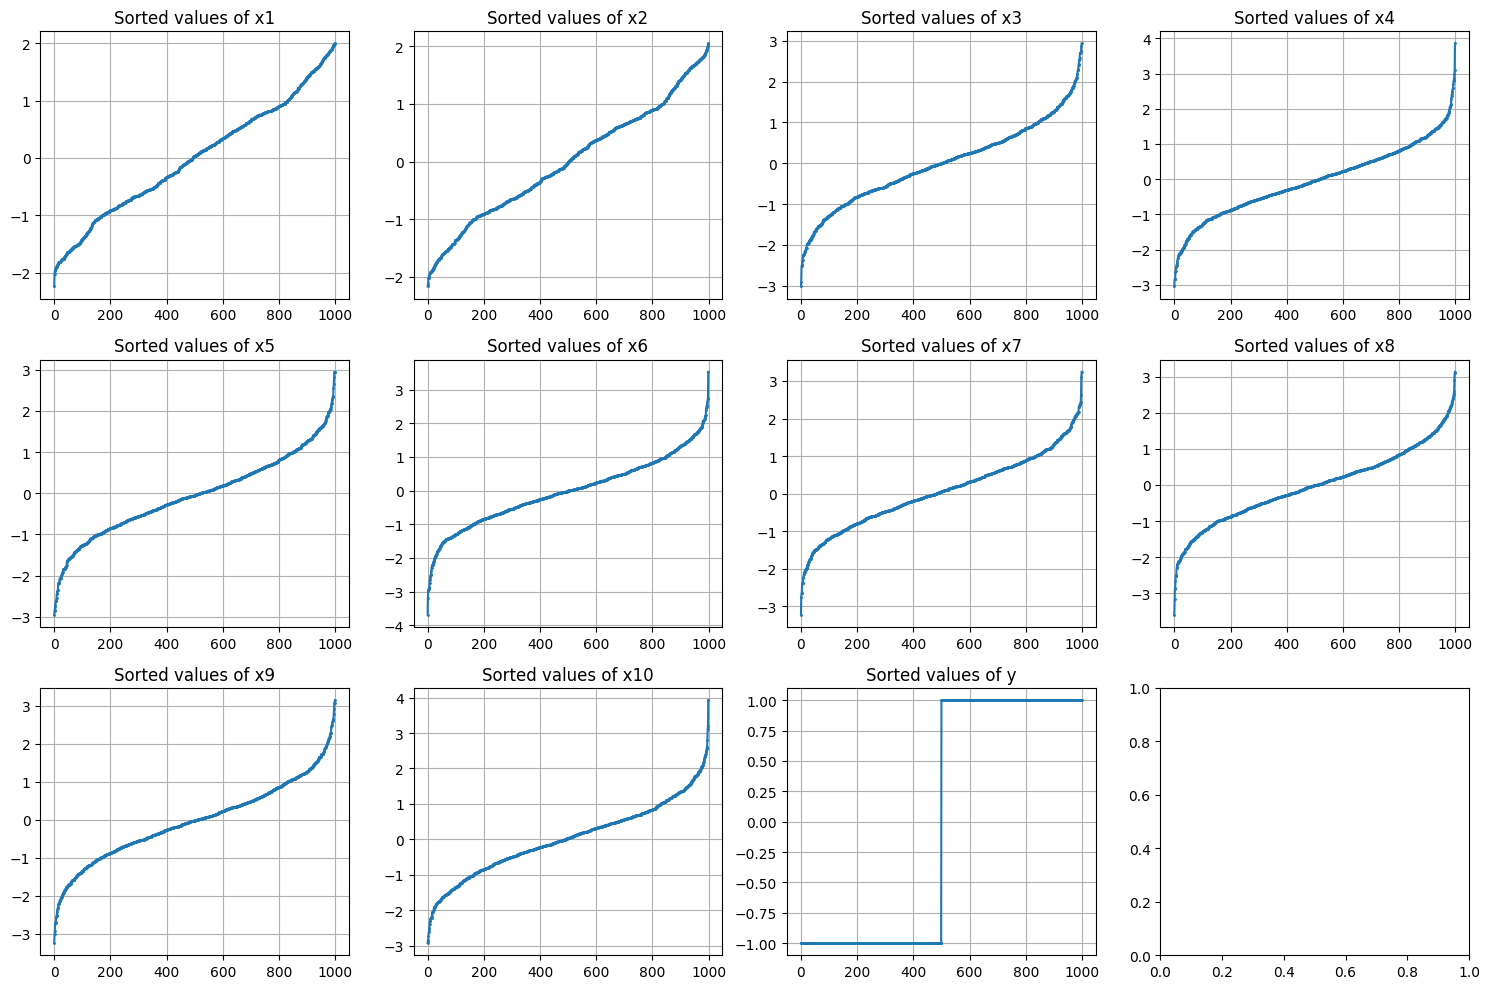

In [27]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axs = axs.flatten()

for i, column in enumerate(df.columns):
    sorted_values = np.sort(df[column].values)
    axs[i].plot(sorted_values, marker='o', linestyle='-', markersize=1)
    axs[i].set_title(f"Sorted values of {column}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

Now, we display data after Normalization:

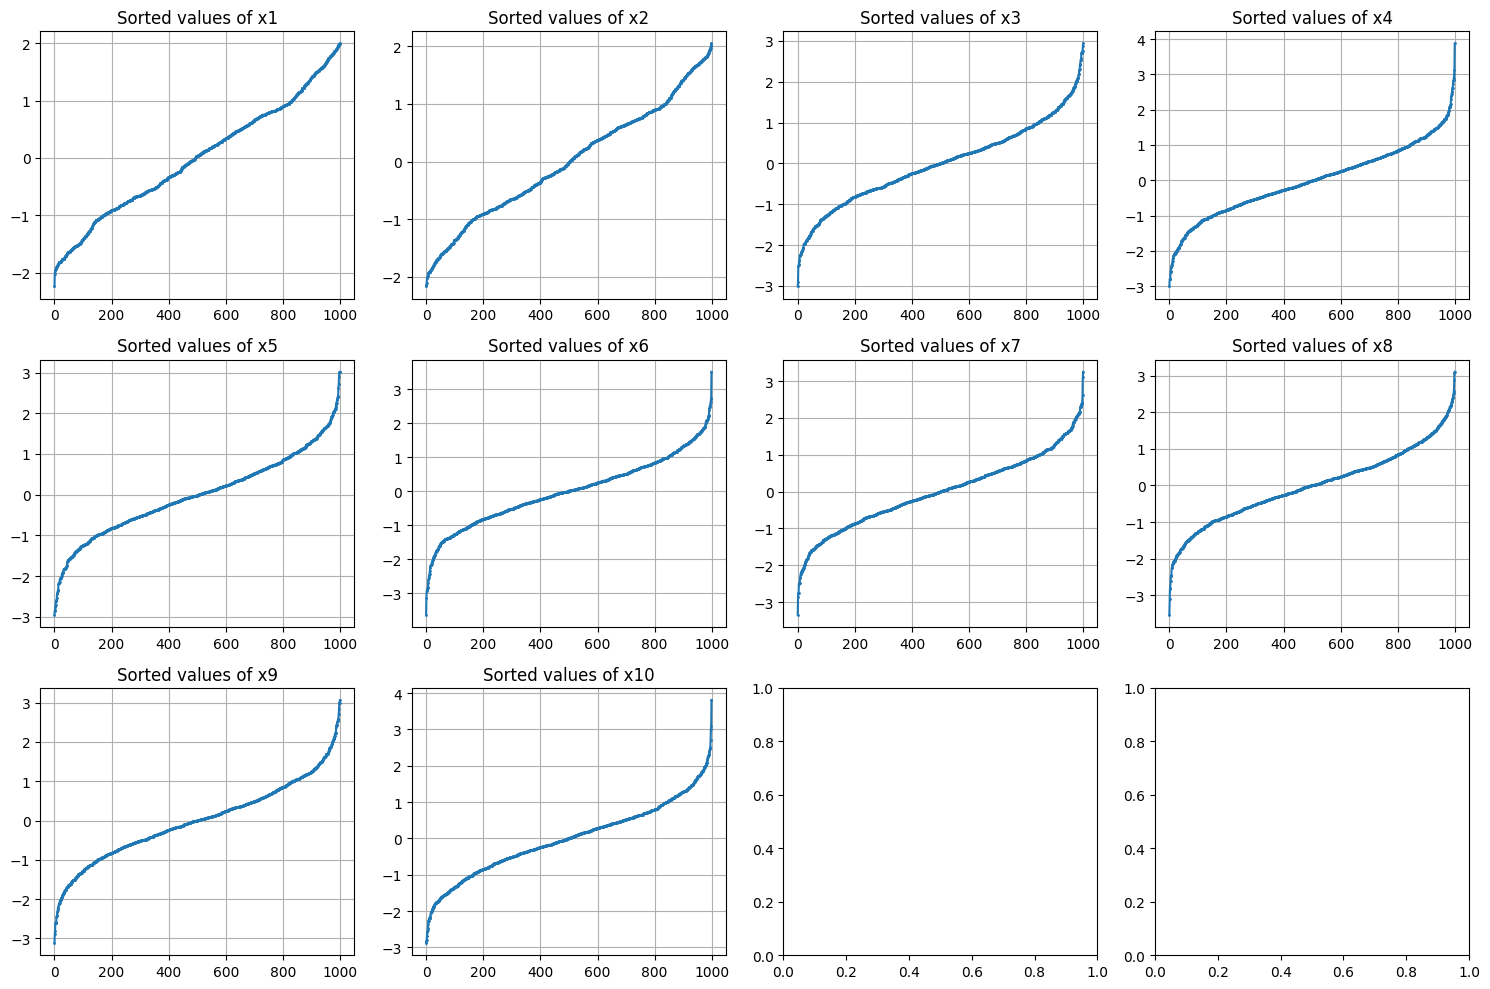

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_ = pd.DataFrame(X_scaled, columns=df.drop('y',axis=1).columns)

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
axs = axs.flatten()

for i, column in enumerate(X_scaled_.columns):
    sorted_values = np.sort(X_scaled_[column].values)
    axs[i].plot(sorted_values, marker='o', linestyle='-', markersize=1)
    axs[i].set_title(f"Sorted values of {column}")
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [29]:
print(X[::200])

[[ 0.75451165  0.36882846  0.49671415 -0.1382643   0.64768854  1.52302986
  -0.23415337 -0.23413696  1.57921282  0.76743473]
 [ 1.7553106   0.62821749 -0.18289644  1.37487642 -0.64596418 -0.79919201
  -0.48274352 -0.95332861  0.12267032  1.62467846]
 [ 1.9168349   0.47276274  0.18517554  0.42544486  0.22228986  1.27886581
  -0.95231638 -0.67699514 -0.77265945  0.83019181]
 [ 1.92863999  0.22626425  0.50702027 -0.05739537 -1.3954485  -0.70791094
  -0.26274675 -1.59589397 -0.73902866  0.65233034]
 [ 0.73902598  0.51013991  0.33011379 -0.81401067 -0.36567708  0.50427075
   0.5214494   1.33696907 -0.0822537   0.30645086]]


In [30]:
print(X_scaled[::200])

[[ 0.75451165  0.36882846  0.50005258 -0.1079961   0.69137884  1.52249849
  -0.29658016 -0.2174599   1.54266063  0.72124761]
 [ 1.7553106   0.62821749 -0.17925782  1.40337241 -0.61635306 -0.777368
  -0.55008138 -0.92662244  0.13391594  1.55883159]
 [ 1.9168349   0.47276274  0.18865157  0.45505284  0.26135043  1.28068494
  -1.02893098 -0.65414243 -0.73203273  0.78256545]
 [ 1.92863999  0.22626425  0.51035414 -0.02722188 -1.37399424 -0.68696567
  -0.32573841 -1.56022724 -0.69950557  0.60878299]
 [ 0.73902598  0.51013991  0.3335258  -0.78295103 -0.33301552  0.51354669
   0.47395008  1.33173708 -0.0642833   0.2708358 ]]


In [31]:
from scipy.stats import normaltest

# Assuming df is your dataset with only feature columns
results = {}
for col in df.columns:
    stat, p = normaltest(df[col])
    results[col] = {"statistic": stat, "p-value": p}

# Interpret results
for col, res in results.items():
    print(f"{col}: statistic={res['statistic']:.3f}, p-value={res['p-value']:.3f}")
    if res['p-value'] < 0.25:
        print(f"  ❌ Reject H0: {col} is not normally distributed")
    else:
        print(f"  ✅ Fail to reject H0: {col} may be normally distributed")


x1: statistic=139.594, p-value=0.000
  ❌ Reject H0: x1 is not normally distributed
x2: statistic=128.548, p-value=0.000
  ❌ Reject H0: x2 is not normally distributed
x3: statistic=0.687, p-value=0.709
  ✅ Fail to reject H0: x3 may be normally distributed
x4: statistic=1.576, p-value=0.455
  ✅ Fail to reject H0: x4 may be normally distributed
x5: statistic=0.074, p-value=0.964
  ✅ Fail to reject H0: x5 may be normally distributed
x6: statistic=2.017, p-value=0.365
  ✅ Fail to reject H0: x6 may be normally distributed
x7: statistic=0.457, p-value=0.796
  ✅ Fail to reject H0: x7 may be normally distributed
x8: statistic=0.075, p-value=0.963
  ✅ Fail to reject H0: x8 may be normally distributed
x9: statistic=0.485, p-value=0.784
  ✅ Fail to reject H0: x9 may be normally distributed
x10: statistic=0.189, p-value=0.910
  ✅ Fail to reject H0: x10 may be normally distributed
y: statistic=3764.461, p-value=0.000
  ❌ Reject H0: y is not normally distributed


as we can see we the data is Normalized, so we continue with given X and y

#### train test split:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np.array(y_train)
X_train = np.array(X_train)

#### Model Evaluation

In [33]:
def Print_ModelEvaluation(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true ,y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print(classification_report(y_true,y_pred))

### Hard Margin SVM

The problem is 
$$
\begin{aligned}
& \min_{\mathbf{w}, b} \quad \frac{1}{2} \|\mathbf{w}\|^2 \\
& \text{s.t.} \quad y_i (\mathbf{w}^\top \mathbf{x}_i + b) \geq 1
\end{aligned}
$$
it assumes that the data is perfectly linearly separable.


#### manually implementation

In [34]:
n = X_train.shape[0]
w = cp.Variable(10)
b = cp.Variable()
objective = cp.Minimize(0.5 * cp.sum_squares(w))
constrains = [y_train[i]*(w.T@X_train[i]+b) >= 1 for i in range(n)]
problem = cp.Problem(objective,constrains)
problem.solve()

inf

evaluation:

In [35]:
w_HMM = w.value
b_HMM = b.value
print(b_HMM,w_HMM)
# y_HMM = np.sign(X @ w_HMM + b_HMM)
# Print_ModelEvaluation(y,y_HMM)

None None


so, this problem has no solution, in other word, there is no line that perfectly seperate data.

#### scikit-learn implementation

In [36]:
HMS = SVC(kernel='linear', C=1e10,max_iter=10**6)
HMS.fit(X_train, y_train)
y_HMS = HMS.predict(X_test)
Print_ModelEvaluation(y_test,y_HMS)

Accuracy: 0.54
Precision: 0.5338983050847458
Recall: 0.63
F1-score: 0.5779816513761468
              precision    recall  f1-score   support

          -1       0.55      0.45      0.49       100
           1       0.53      0.63      0.58       100

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200



c:\Users\nopou\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


### Soft Margin SVM

The soft margin SVM follows a somewhat similar optimization procedure with a couple of differences. First, in this scenario, we allow misclassifications to happen. So we’ll need to minimize the misclassification error, which means that we’ll have to deal with one more constraint. Second, to minimize the error, we should define a loss function. A common loss function used for soft margin is the hinge loss.

$$
\max \left\{ 0,\ 1 - y_i (\mathbf{w}^\top \mathbf{x}_i + b) \right\}
$$

The loss of a misclassified point is called a slack variable $ \zeta_i $, and it is added to the primal problem that we had for the hard-margin SVM. So the primal optimization problem for the soft-margin SVM becomes:

$$
\begin{aligned}
\min_{\mathbf{w}, b, \boldsymbol{\zeta}} \quad & \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \zeta_i \\
\text{s.t.} \quad & y_i (\mathbf{w}^\top \mathbf{x}_i + b) \geq 1 - \zeta_i,\quad \forall i = 1, \ldots, n \\
& \zeta_i \geq 0,\quad \forall i
\end{aligned}
$$

Slack variables $\xi_i$ serve several important purposes:
* Allow for misclassification of training points
* Measure the degree of misclassification
* Enable the model to handle:
    * Non-linearly separable data
    * Noisy data points
    * Outliers

Classification cases based on $\xi_i$ values:
* $\xi_i = 0$: Point is correctly classified
* $0 < \xi_i < 1$: Point is correctly classified but within the margin
* $\xi_i > 1$: Point is misclassified

The new regularization parameter $ C $ controls the trade-off between maximizing the margin and minimizing the loss due to misclassified points.

* **Large $C$**:

  * Strongly penalizes misclassification
  * Leads to a **narrow margin** and low training error
  * Risk of **overfitting**
* **Small $C$**:

  * Allows more violations (slack)
  * Leads to a **wider margin**
  * Better **generalization**

#### manually implementation

In [37]:
n = X_train.shape[0]
w = cp.Variable(10)
b = cp.Variable()
zeta = cp.Variable(n)
C = 0.1

objective = cp.Minimize(0.5 * cp.sum_squares(w) + C*cp.sum(zeta))
constrains = [y_train[i]*(w.T@X_train[i]+b) >= 1-zeta[i] for i in range(n)] + [zeta >= 0]

problem = cp.Problem(objective,constrains)
problem.solve()

np.float64(77.48317568298268)

evaluation:

In [38]:
w_SMM = w.value
b_SMM = b.value
y_SMM = np.sign(X_test @ w_SMM + b_SMM)
Print_ModelEvaluation(y_test,y_SMM)

Accuracy: 0.53
Precision: 0.5254237288135594
Recall: 0.62
F1-score: 0.5688073394495413
              precision    recall  f1-score   support

          -1       0.54      0.44      0.48       100
           1       0.53      0.62      0.57       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.53      0.53       200



In [39]:
print("the vector w is: ", w_SMM)
print("b is equal to: ",b_SMM)

the vector w is:  [ 0.05943496  0.26682269 -0.17893816 -0.36735097 -0.0523809  -0.08156635
 -0.0355427  -0.17388632  0.07340227 -0.13048101]
b is equal to:  0.07792617674685552


#### scikit-learn implementation

In [40]:
SMS = SVC(kernel='linear', C=1.0)
SMS.fit(X_train, y_train)
y_SMS = SMS.predict(X_test)
Print_ModelEvaluation(y_test,y_SMS)

Accuracy: 0.535
Precision: 0.5299145299145299
Recall: 0.62
F1-score: 0.5714285714285714
              precision    recall  f1-score   support

          -1       0.54      0.45      0.49       100
           1       0.53      0.62      0.57       100

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.54      0.54      0.53       200



### Kernel SVM

#### what is kernel trick

In many real-world scenarios, the data is not linearly separable in the original feature space. Kernels help by implicitly mapping the original feature space into a higher-dimensional space where the data might be more easily separable.

**Why Use Kernels?**
1. **Non-Linearity Handling:** Kernels allow SVMs to handle non-linearly separable data by transforming the feature space. This is achieved without explicitly performing the transformation, which can be computationally expensive.
2. **Flexibility:** Different kernels can be used depending on the nature of the data and the problem at hand, allowing SVMs to adapt to a variety of tasks.
3. **Feature Extraction:** Kernels can implicitly perform feature extraction by projecting data into a space where it becomes linearly separable.

When data is not linearly separable in the original feature space, SVM uses a method called the **kernel trick** to map the data to a higher-dimensional. This allows the SVM to create non-linear decision boundaries in the original space — without explicitly computing the mapping. feature space.

Instead of working with input vectors $ \mathbf{x}_i\mathbf{x}_i $, we work with their dot products in a higher-dimensional space $ \phi(\mathbf{x}_i) . \phi(\mathbf{x}_j) $. The kernel function 
$$
K(\mathbf{x}_i, \mathbf{x}_j) = \langle \phi(\mathbf{x}_i), \phi(\mathbf{x}_j) \rangle
$$
​computes this dot product efficiently.

#### Common Kernel Functions

1. **Linear Kernel**:
   * $K(x_i,x_j) = x_i^Tx_j$
   * Equivalent to no kernel

2. **Polynomial Kernel**:
   * $K(x_i,x_j) = (x_i^Tx_j + c)^d$
   * Parameters: degree d, constant c

3. **Radial Basis Function (RBF/Gaussian)**:
   * $K(x_i,x_j) = \exp(-\gamma||x_i-x_j||^2)$
   * Parameter: γ controls width

4. **Sigmoid Kernel**:
   * $K(x_i,x_j) = \tanh(ax_i^Tx_j + b)$
   * Parameters: a, b


#### dual form of the SVM objective function

we start with Soft-margin SVM problem that we had:
$$
\begin{aligned}
\min_{\mathbf{w}, b, \boldsymbol{\zeta}} \quad & \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^{n} \zeta_i \\
\text{s.t.} \quad & y_i(\mathbf{w}^\top \mathbf{x}_i + b) \ge 1 - \zeta_i,\quad \zeta_i \ge 0
\end{aligned}
$$
Now, we define Lagrange function:
$$
\begin{aligned}
\mathcal{L}(\mathbf{w}, b, \boldsymbol{\zeta}, \boldsymbol{\alpha}, \boldsymbol{\mu}) = 
\frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^n \zeta_i
- \sum_{i=1}^n \alpha_i \left[ y_i (\mathbf{w}^\top \mathbf{x}_i + b) - 1 + \zeta_i \right]
- \sum_{i=1}^n \mu_i \zeta_i
\end{aligned}
$$
such that $\mu_i \ge 0$ and $ \alpha_i \ge 0 $. To form the dual, we take derivatives of $\mathcal{L}(\mathbf{w}, b, \boldsymbol{\zeta}, \boldsymbol{\alpha}, \boldsymbol{\mu})$ , and set them to zero
1. **With respect to** $\mathbf{w}$:
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i = 0 
\quad \Rightarrow \quad 
\mathbf{w} = \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i
$$

2. **With respect to** $b$:
$$
\frac{\partial \mathcal{L}}{\partial b} = -\sum_{i=1}^n \alpha_i y_i = 0 
\quad \Rightarrow \quad 
\sum_{i=1}^n \alpha_i y_i = 0
$$

3. **With respect to** $\zeta_i$:
$$
\frac{\partial \mathcal{L}}{\partial \zeta_i} = C - \alpha_i - \mu_i = 0 
\quad \Rightarrow \quad 
\alpha_i \le C
$$

Now, we substitute $\mathbf{w} = \sum_{i=1}^n \alpha_i y_i \mathbf{x}_i$ into the original Lagrangian and eliminate $\zeta_i,\mu_i$. so we have:
$$
\begin{aligned}
\max_{\boldsymbol{\alpha}} \quad & \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j (\mathbf{x}_i^\top \mathbf{x}_j) \\
\text{s.t.} \quad & 0 \le \alpha_i \le C \\
& \sum_{i=1}^n \alpha_i y_i = 0
\end{aligned}
$$

We have defined Kernel function before, so:
$$
K(\mathbf{x}_i, \mathbf{x}_j) = \langle \phi(\mathbf{x}_i), \phi(\mathbf{x}_j) \rangle
\Rightarrow \mathbf{x}_i^\top \mathbf{x}_j \rightarrow K(\mathbf{x}_i, \mathbf{x}_j)
$$

At last, we have
$$
\begin{aligned}
\max_{\boldsymbol{\alpha}} \quad & \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j y_i y_j K(\mathbf{x}_i, \mathbf{x}_j) \\
\text{s.t} \quad & 0 \le \alpha_i \le C \\
& \sum_{i=1}^n \alpha_i y_i = 0
\end{aligned}
$$


#### When to Use Kernelized SVM


Use kernelized SVM when:
* Data is not linearly separable
* Complex decision boundaries exist
* Feature interactions are important
* Number of features is smaller than samples

Consider linear SVM when:
* Data is linearly separable
* High-dimensional data (many features)
* Need faster training/prediction
* Need more interpretable models

Trade-offs:
* Kernel SVM: More flexible but slower, risk of overfitting
* Linear SVM: Faster, simpler, more interpretable

#### kernel SVM manually implementation

In [41]:
def Kernel(X_i, X_j, kernel='rbf', gamma=1.0, degree=3, coeff=0):
    if kernel == 'linear':
        return X_i @ X_j.T
    
    elif kernel == 'rbf':
        n1, n2 = X_i.shape[0], X_j.shape[0]
        K = np.zeros((n1, n2))
        for i in range(n1):
            for j in range(n2):
                K[i, j] = np.exp(-gamma * np.linalg.norm(X_i[i] - X_j[j])**2)
        return K
    
    elif kernel == 'poly':
        return (gamma * X_i @ X_j.T + coeff) ** degree

In [42]:
n = X_train.shape[0]
C = 5
alpha = cp.Variable(n)
K = Kernel(X_i=X_train,X_j=X_train)
Q = np.outer(y_train, y_train) * K

objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha,Q))
constraints = [alpha >= 0 ,alpha <= C, alpha.T@y_train == 0]

problem = cp.Problem(objective, constraints)
problem.solve()

np.float64(380.3282397747473)

evaluation and result:

In [43]:
alpha_val = alpha.value
support_mask = alpha_val > 1e-5
alpha_support = alpha_val[support_mask]
X_support = X_train[support_mask]
y_support = y_train[support_mask]

def decision_function(X_test):
    K_test = Kernel(X_test, X_support,gamma=0.5)
    return np.dot(K_test, alpha_support * y_support)

y_KerM = np.sign(decision_function(X_test))
Print_ModelEvaluation(y_test,y_KerM)

Accuracy: 0.73
Precision: 0.6513157894736842
Recall: 0.99
F1-score: 0.7857142857142857
              precision    recall  f1-score   support

          -1       0.98      0.47      0.64       100
           1       0.65      0.99      0.79       100

    accuracy                           0.73       200
   macro avg       0.82      0.73      0.71       200
weighted avg       0.82      0.73      0.71       200



#### scikit-learn Implimentation

In [44]:
KerS = SVC(kernel="rbf", C=2, gamma=0.075)
KerS.fit(X_train, y_train)
y_KerS = KerS.predict(X_test)
Print_ModelEvaluation(y_test,y_KerS)

Accuracy: 0.965
Precision: 0.9428571428571428
Recall: 0.99
F1-score: 0.9658536585365853
              precision    recall  f1-score   support

          -1       0.99      0.94      0.96       100
           1       0.94      0.99      0.97       100

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



### Logistic Regression Model

In [45]:
LRM = LogisticRegression()
LRM.fit(X_train, y_train)
y_LRM = LRM.predict(X_test)
Print_ModelEvaluation(y_test,y_LRM)

Accuracy: 0.515
Precision: 0.514018691588785
Recall: 0.55
F1-score: 0.5314009661835749
              precision    recall  f1-score   support

          -1       0.52      0.48      0.50       100
           1       0.51      0.55      0.53       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200



### Comparison

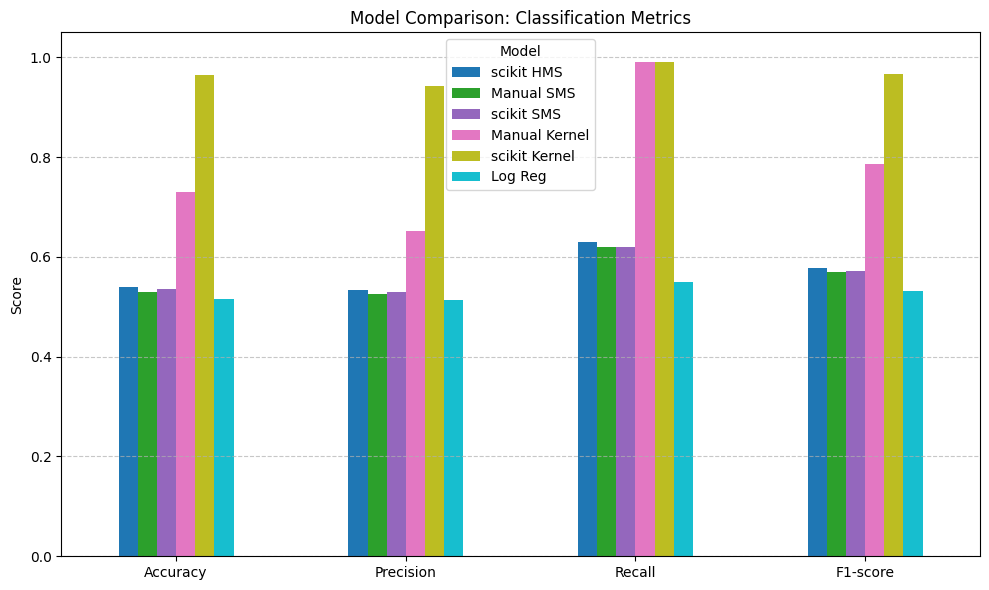

In [46]:

def get_classification_metrics(name, y_true, y_pred):
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, pos_label=1),
        "Recall": recall_score(y_true, y_pred, pos_label=1),
        "F1-score": f1_score(y_true, y_pred, pos_label=1)
    }

# Collect results
results = [
    get_classification_metrics("scikit HMS", y_test, y_HMS),
    get_classification_metrics("Manual SMS", y_test, y_SMM),
    get_classification_metrics("scikit SMS", y_test, y_SMS),
    get_classification_metrics("Manual Kernel", y_test, y_KerM),
    get_classification_metrics("scikit Kernel", y_test, y_KerS),
    get_classification_metrics("Log Reg", y_test, y_LRM),
]

df = pd.DataFrame(results).set_index("Model").round(4)

# Plot grouped bar chart
df.T.plot(kind="bar", figsize=(10, 6), colormap="tab10")
plt.title("Model Comparison: Classification Metrics")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1.05)
plt.legend(title="Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


###  Regularization in SVM





Regularization helps prevent **overfitting** by controlling the complexity of the model (mainly the size of the margin vector $w$).

#### 1. Hard-Margin SVM

Assumes perfect separability, so no slack variables:

$$
\min_{w, b} \quad \frac{1}{2} \|w\|^2
$$

The term $\frac{1}{2} \|w\|^2$ **is the regularization** — it encourages a **large margin** (small $w$).


#### 2. Soft-Margin SVM

Allows some misclassification using **slack variables** $\xi_i$:

$$
\min_{w, b, \xi} \quad \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} \xi_i
$$

* $\frac{1}{2} \|w\|^2$: regularization (margin maximization)
* $C \sum \xi_i$: penalty for misclassification

 The balance between these two is controlled by the **regularization parameter $C$**.


#### 3. Kernel SVM (Dual Form)

$$
\max_{\alpha} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i,j=1}^{n} \alpha_i \alpha_j y_i y_j K(x_i, x_j)
$$

S.t.:

$$
0 \leq \alpha_i \leq C,\quad \sum_{i=1}^{n} \alpha_i y_i = 0
$$

Here, $C$ acts as a **bound on the Lagrange multipliers** $\alpha_i$, indirectly controlling regularization.


####  Effect of the Regularization Parameter $C$

* **Large $C$**:

  * Strongly penalizes misclassification
  * Tries to classify all training points correctly
  * Can lead to **overfitting** (low bias, high variance)

* **Small $C$**:

  * Allows more margin violations (soft margins)
  * Focuses on a **simpler model** with better generalization
  * Can lead to **underfitting** (high bias, low variance)

#### Primal vs Dual Regularization

* **Primal Form**
  * Direct control through ||w||²
  * Explicit regularization term
  * Intuitive geometric interpretation
  * Suitable for linear SVMs

* **Dual Form**
  * Indirect control through α bounds
  * Implicit regularization via kernels
  * Mathematical elegance
  * Better for non-linear cases


### Hyperparameter Tuning

               Accuracy  Precision  Recall  F1-score
Model                                               
scikit SMS        0.535     0.5299    0.62    0.5714
scikit Kernel     0.820     0.8721    0.75    0.8065
Log Reg           0.515     0.5140    0.55    0.5314


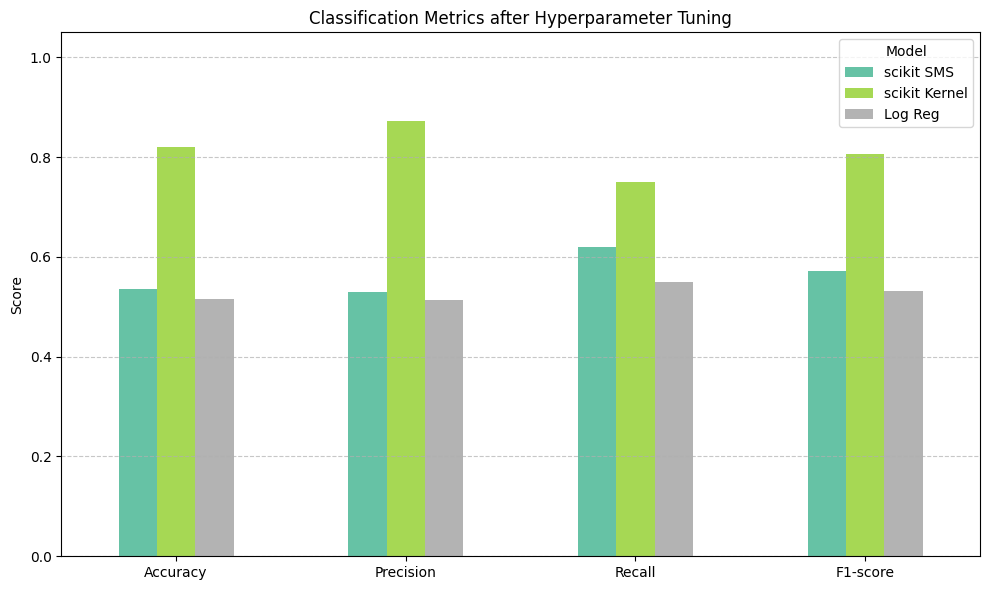

In [47]:
from sklearn.model_selection import GridSearchCV


# Soft-Margin SVM
grid_sms = GridSearchCV(
    SVC(kernel='linear'),
    param_grid={'C': [0.01*i for i in range(50,150)]},
    scoring='f1',
    cv=5
)
grid_sms.fit(X_train, y_train)
y_SMS = grid_sms.best_estimator_.predict(X_test)

# Kernel SVM (RBF)
grid_ker = GridSearchCV(
    SVC(kernel='rbf'),
    param_grid={
        'C': [0.3*i for i in range(5,20)],
        'gamma': [0.02*i for i in range(35,70)]
    },
    scoring='f1',
    cv=5
)
grid_ker.fit(X_train, y_train)
y_KerS = grid_ker.best_estimator_.predict(X_test)

# Logistic Regression
grid_lr = GridSearchCV(
    LogisticRegression(),
    param_grid={'C': [0.01, 0.1, 1, 10, 100]},
    scoring='f1',
    cv=5
)
grid_lr.fit(X_train, y_train)
y_LRM = grid_lr.best_estimator_.predict(X_test)

# Collect and compare
results = [
    get_classification_metrics("scikit SMS", y_test, y_SMS),
    get_classification_metrics("scikit Kernel", y_test, y_KerS),
    get_classification_metrics("Log Reg", y_test, y_LRM),
]

# Display as table
df_results = pd.DataFrame(results).set_index("Model").round(4)
print(df_results)

# Plot results
import matplotlib.pyplot as plt
df_results.T.plot(kind="bar", figsize=(10, 6), colormap="Set2")
plt.title("Classification Metrics after Hyperparameter Tuning")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
